분석 : 캐글러 대상 설문조사
설문기간 : 2017년 8월 7일 ~ 8월 25일
응답자 : 171개 국가 및 지역 16,716명
특징
    50명 미만의 특정 국가 및 지역일 경우 '기타'그룹
    설문조사 시스템에 신고 된 응답자와 필수질문(취업상태)에 미응답자 제외
    대부분의 조사자는 이메일, 토론 포럼 및 소셜미디어 캐글 채널로 설문을 알게 됨
    급여데이터는 일부 통화에서만 받고 해당 되는 통화에 기준하여 작성
    미국 달러로 환산이 가능한 csv제공
    취업자와 미취업자의 설문은 다름

데이터파일
    schema.csv : 설문 스키마가 있는 csv. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열에 해당하는 질문 포함
    multipleChoiceResponses.csv : 객관식 및 순위 질문 응다바자 답변, 각 행은 한 응답자의 응답
    freeformResponses.csv : Kaggle의 설문조사 질문에 대한 응답의 주관식 답변. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
    conversionRates.csv : R패키지 "quantmod"에서 2017년 9월 14일 액세스 한 통화 변환율(USD)
    RespondentTupeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩 스키마

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/kaggle_2017_survey/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
mcq = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/kaggle_2017_survey/multipleChoiceResponses.csv', engine = 'python')    # 오류가 나면 low_memory = False
mcq.shape

(16716, 228)

In [5]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

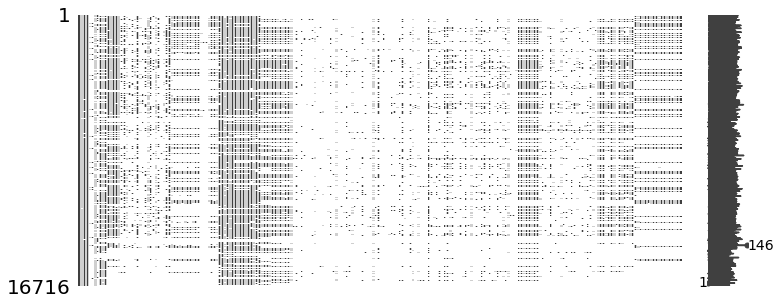

In [7]:
# missingno는 결착치 데이터 시각화
# 결측치 데이터 칼럼이 많아 아래 그래프만으로는 내용을 파악하기 힘들다

# !pip install missingno
import missingno as msno

msno.matrix(mcq, figsize = (12,5))

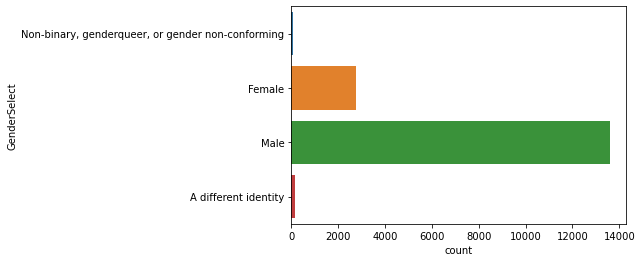

In [8]:
# 성별
sns.countplot(y='GenderSelect', data = mcq)

In [9]:
# contry 칼럼을 인덱스 지정

con_df = pd.DataFrame(mcq['Country'].value_counts())
print(con_df)


                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238
Netherlands                      205
Ukraine                          196
South Korea                      194
Singapore                        184
Poland                           184
Pakistan                         161
Turkey                           144
Indonesia                        131
Switzerland                      129
South Africa                     127
Mexico                           126
C

In [10]:
# 칼럼의 순서대로 응담 수, 국가로 칼럼명 지정
con_df['국가'] = con_df.index
con_df.columns = ['응답 수', '국가']

# 인덱스 칼럼을 삭제하고 순위를 알기 위해 reset_index()한다.
con_df = con_df.reset_index().drop('index', axis = 1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

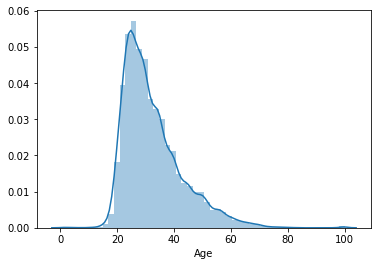

In [11]:
# 연령에 대한 정보를 본다 (R의 summary)
display(mcq['Age'].describe())
display(sns.distplot(mcq[mcq['Age'] > 0]['Age']))

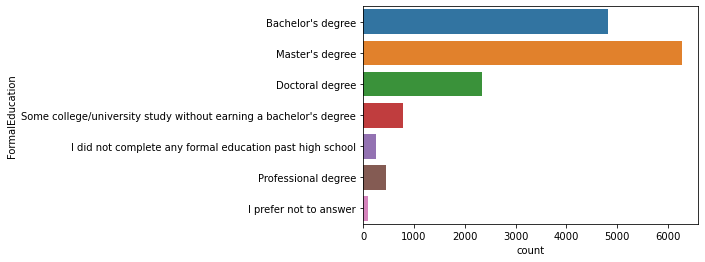

In [12]:
# 학력에 대한 그래프
sns.countplot(y = 'FormalEducation', data = mcq)

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


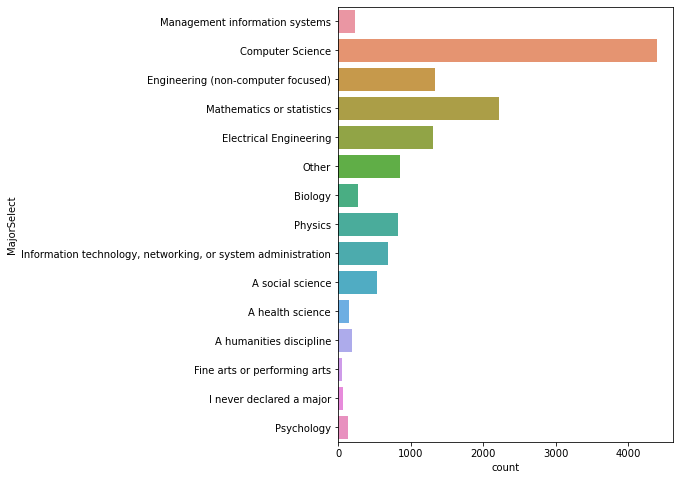

In [13]:
# value_counts를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize = True 옵션은 데이터의 비율을 나타낸다.
# 다음 그래프는 응답자들의 전공과 비율을 나타내는 표.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)
mcq_major_df.columns = ['응답 수', '비율']

# 시각화
plt.figure(figsize = (6, 8))

display(mcq_major_df)
display(sns.countplot(y = 'MajorSelect', data = mcq))

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


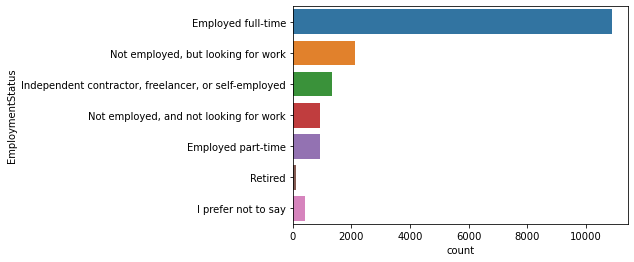

In [14]:
# 취업여부의 응답 수와 비율
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize = True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index = True, right_index = True)
mcq_es_df.columns = ['응답 수', '비율']


display(mcq_es_df)
display(sns.countplot(y = 'EmploymentStatus', data = mcq))    # seaborn에서 바로 시각화 그래프 출력

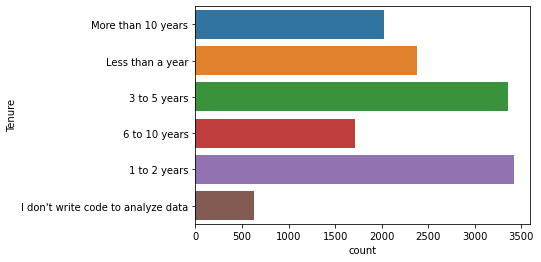

In [15]:
# Tenure항목은 데이터 사이언스 분야에서 코딩 경험이 얼마나 되는가 질문
# 대부분이 5년 미만, 1,2년 경험이 많다.
sns.countplot(y = 'Tenure', data = mcq)

The number of interviewees in Korea:194


<function matplotlib.pyplot.show(*args, **kw)>

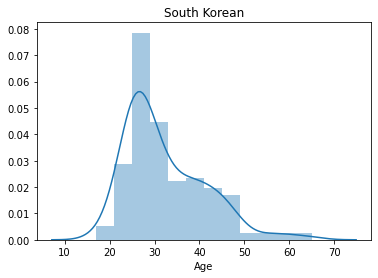

In [16]:
# 우리나라만 추출해 시각화(결측치는 삭제)
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

print('The number of interviewees in Korea:' + str(korea.shape[0]))    # + str(korea.shape[0]) 응답자 수

sns.distplot(korea['Age'].dropna())
plt.title('South Korean')
plt.show

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korea')

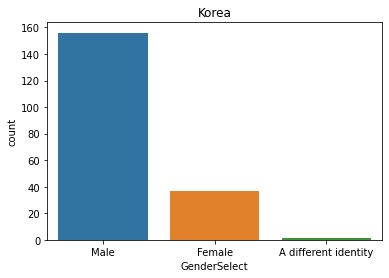

In [17]:
# 한국인의 성비와 시각화
sns.countplot(x='GenderSelect', data = korea)

display(pd.DataFrame(korea['GenderSelect'].value_counts()))
display(plt.title('Korea'))

Text(0.5, 1.0, 'korean Male')

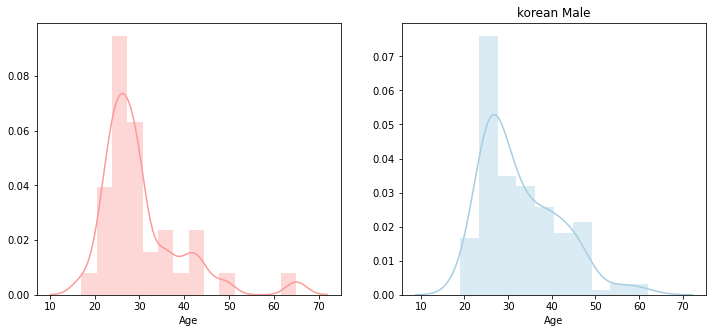

In [18]:
# 성별을 연령대로 나누어 시각화
figure, (ax1, ax2) = plt.subplots(ncols = 2)

figure.set_size_inches(12, 5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[4], ax = ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[0], ax = ax2)
plt.title('korean Male')

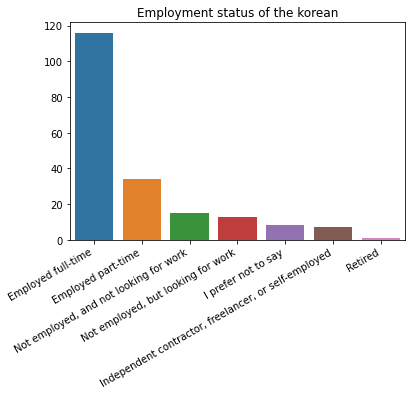

In [19]:
sns.barplot(x = korea['EmploymentStatus'].unique(), y = korea['EmploymentStatus'].value_counts())
plt.xticks(rotation = 30, ha = 'right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

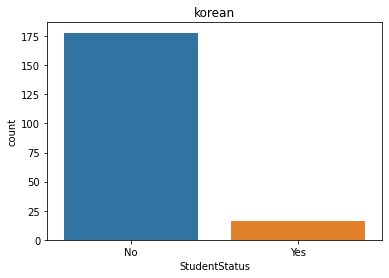

In [20]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x = 'StudentStatus', data = korea)
plt.title('korean')
plt.show()

In [21]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


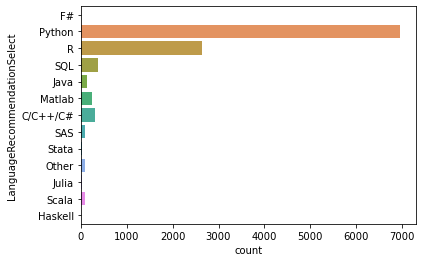

In [22]:
# 빅데이터를 하려면 추천하는 프로그래밍 언어
display(sns.countplot(y = mcq['LanguageRecommendationSelect']))

(11830,)

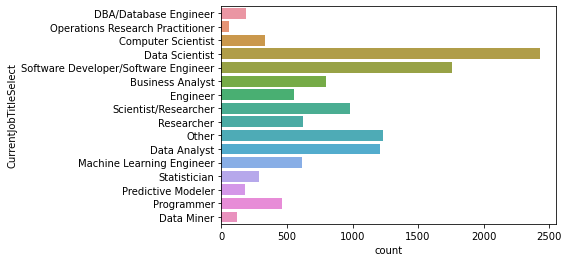

In [23]:
# 현재 종사하고 있는 분야와 응답자 수
display(sns.countplot(y = mcq['CurrentJobTitleSelect']))
display(mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape)

(7158, 228)


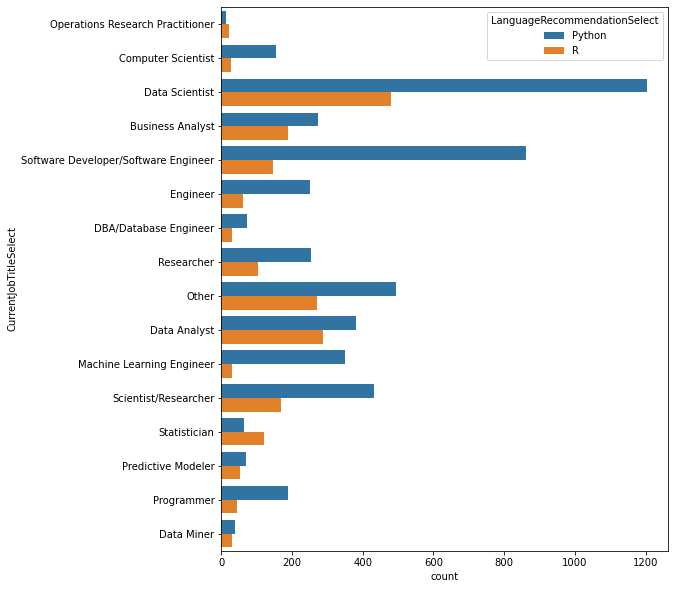

In [24]:
# 응답자 중 python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용는가
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize = (8, 10))
sns.countplot(y = 'CurrentJobTitleSelect',
             hue = 'LanguageRecommendationSelect',
             data = data)

In [25]:
# 데이터사이언스 분야에서 앞으로 주목을 받을 것은?
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_persent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize = 'True'))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_persent,
    left_index = True,
    right_index = True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


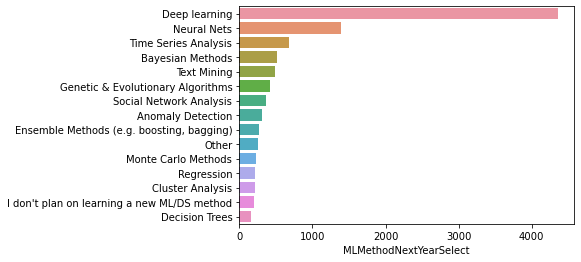

In [26]:
# 데이터사이언스 메소드의 응답 > 어떠한 메소드를 선택해 사용할 것인가
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y = data.index, x = data)
# 응답결과 딥러닝과 뉴럴넷이 인기 있을 것이고, 시계열과 베이지안, 텍스트 마인등의 내용이 있다. 베깅과 부스팅과 같은 앙상블 메소드도 있는 것을 알 수 있다.

In [27]:
# 데이터 사이언스를 배우려면 어디서 배워야 하는가
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'platform'

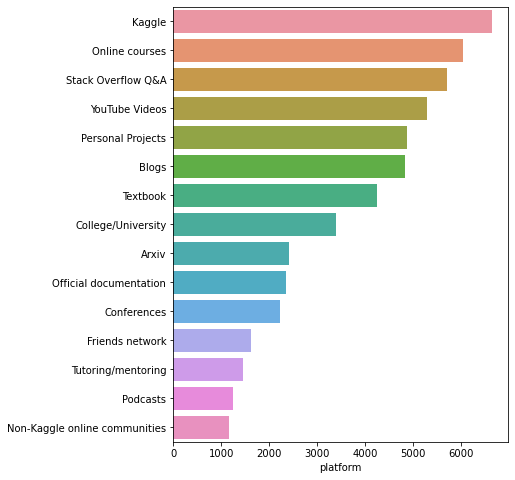

In [28]:
plt.figure(figsize = (6, 8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y = data.index, x= data)

In [29]:
# 설문내용과 설문응답자
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [30]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

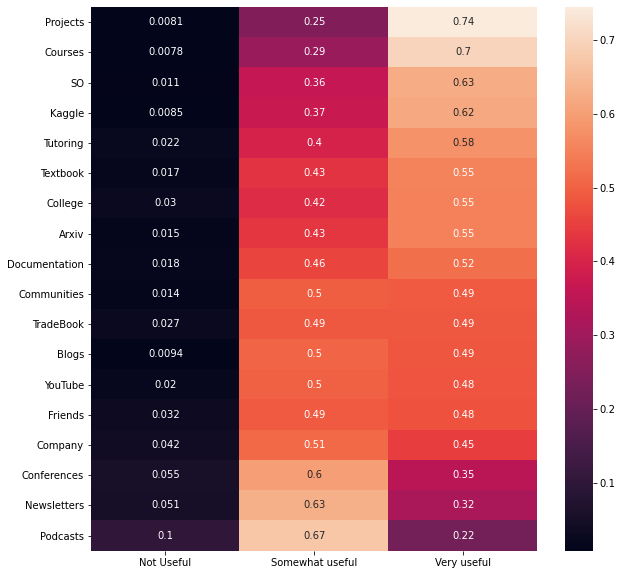

In [31]:
# 학습플랫폼과 유용한가의 연관성
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('learningPlatformUsefulness'):]] = a
    
fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending = False)

# 상관관계
plt.figure(figsize = (10, 10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending = False), annot = True)

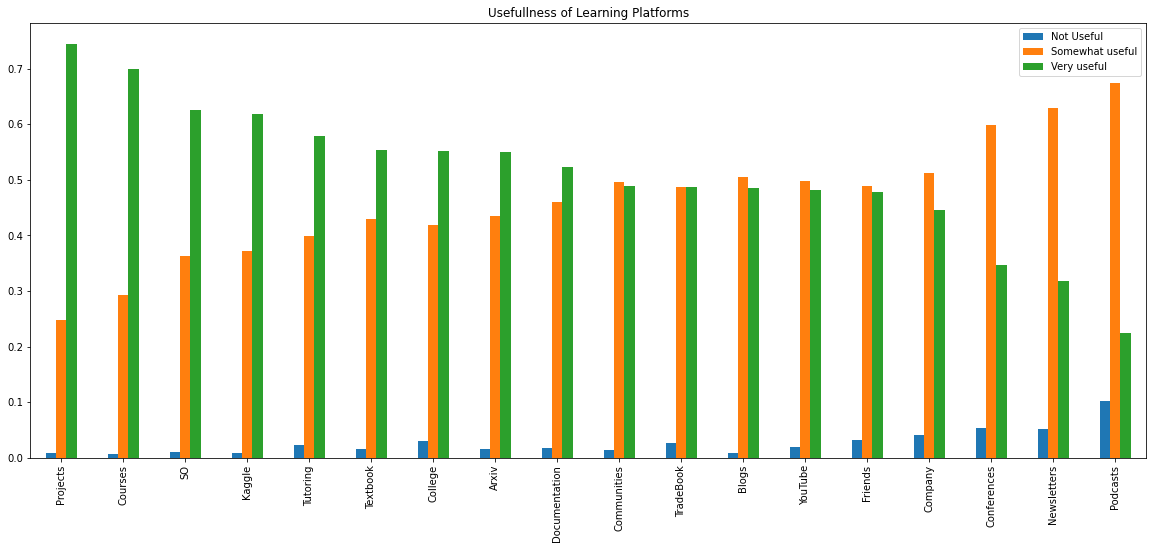

In [32]:
fdf.plot(kind = 'bar', figsize = (20,8),
        title = "Usefullness of Learning Platforms")

In [33]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [34]:
# 파이차트를 그리기 위해 평균값을 구한뒤 cdf로 지정
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategoty'):]] = mcq[feature].mean()

cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

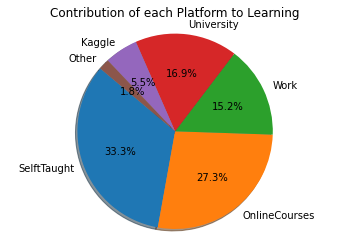

In [35]:
# seaborn은 파이차트를 그리는 기능이 없어 matplotlib의 기능을 사용해 그림
plt.pie(cdf, labels = cdf.index,
       autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [36]:
# 데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가?
qc = question.loc[question[
    'Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [37]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [38]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
             pd.Series(x['HardwarePersonalProjectsSelect']),
             axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'hardware'

s = s[s != 'nan']

pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


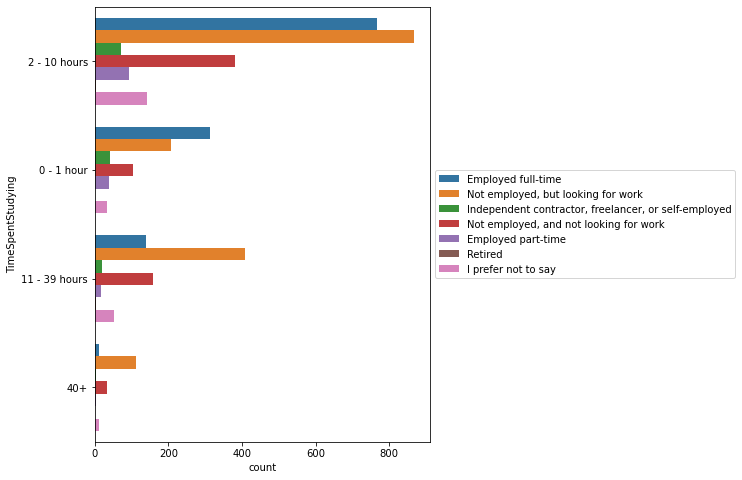

In [40]:
# 데이터 사이언스 공부에 얼마나 많은 시간을 투자하는가
# 취업자와 미취업자의 공부시간은 다르기 때문에 hue에 EmploymentStatus를 입력해 차이를 본다.
plt.figure(figsize = (6, 8))
sns.countplot(y = 'TimeSpentStudying', data = mcq, hue = 'EmploymentStatus'
             ).legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

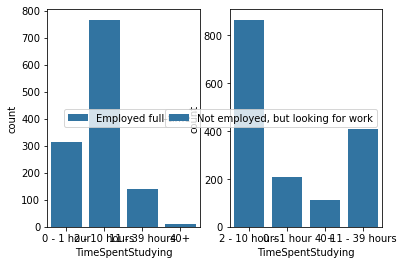

In [117]:
# 다시 한 번더 세분화
# 어떻게 표 크기를 키우는가?
figsure, (ax1, ax2) = plt.subplots(ncols = 2)

figure.set_size_inches(12, 5)
sns.countplot(x = 'TimeSpentStudying', data = full_time, hue = 'EmploymentStatus',
              ax = ax1).legend(loc = 'center right', bbox_to_anchor = (1, 0.5))

sns.countplot(x = 'TimeSpentStudying', data = looking_for_job, hue = 'EmploymentStatus',
              ax = ax2).legend(loc = 'center right', bbox_to_anchor = (1, 0.5))

In [49]:
# 블로그, 팟캐스트, 수업, 기타 등등 추천할 것은?
# mcq에서 BlogsPodcastsNewslettersSelect칼럼 추출하고 split으로 나눔 
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [53]:
# 한 행에 여러 항목이 있기 때문에 다시 한 번 분류를 한다.
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
             axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'platfforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platfforms, dtype: object

In [54]:
# 분류한 항목들을 value_counts로 상위 20개만 묶어서 카운트
s = s[s != 'nan'].value_counts().head(20)

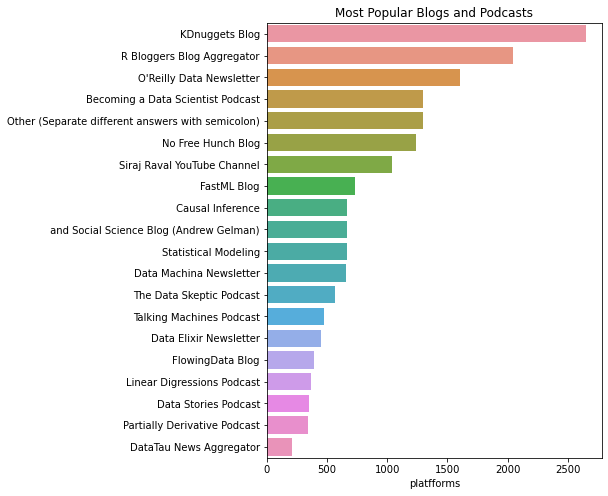

In [55]:
# 시각화
plt.figure(figsize = (6, 8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y = s.index, x = s)

In [56]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [58]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
             axis = 1).stack().reset_index(level = 1, drop = True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [59]:
t = t[t != 'nan'].value_counts()

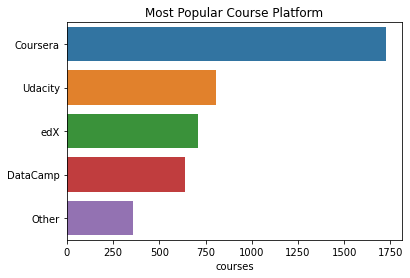

In [60]:
plt.title("Most Popular Course Platform")
sns.barplot(y = t.index, x = t)

In [61]:
# 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은 무엇이가?
job_features = [
    x for x in mcq.columns if x.find('JobSkillImportance') != -1
    and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [62]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSillImoortance'):]] = a
    
jdf

{'eBigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'eDegree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'eStats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'eEnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'ePython': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'eR': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'eSQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'eKaggleRanking': Nice to have 

In [65]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
eBigData,0.379929,0.574065,0.046006
eDegree,0.279867,0.598107,0.122026
eStats,0.513889,0.457576,0.028535
eEnterpriseTools,0.144829,0.564970,0.290200
ePython,0.645994,0.327214,0.026792
eR,0.414807,0.513945,0.071247
eSQL,0.434224,0.491778,0.073998
eKaggleRanking,0.118863,0.677261,0.203876
eMOOC,0.107255,0.606994,0.285752
eVisualizations,0.455392,0.490820,0.053788


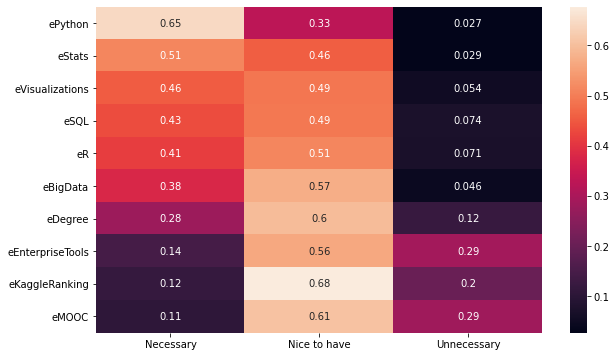

In [66]:
plt.figure(figsize = (10, 6))
sns.heatmap(jdf.sort_values("Necessary", ascending = False), annot = True)

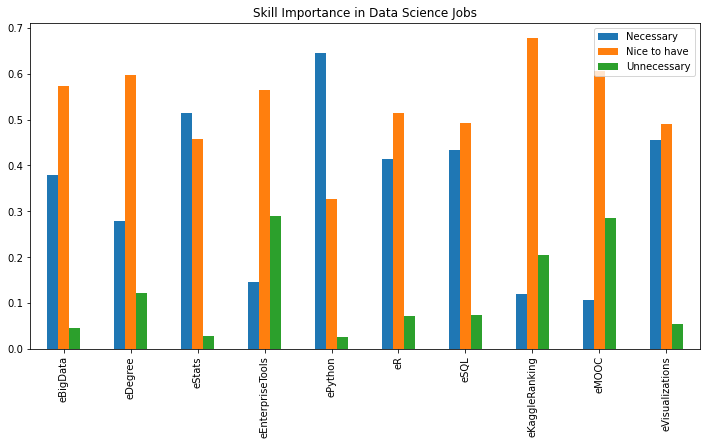

In [67]:
jdf.plot(kind = 'bar', figsize = (12,6),
        title = "Skill Importance in Data Science Jobs")

In [68]:
# 평균급여는?
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [73]:
# 응답 된 데이터에 ','와 '-'가 존재한다. 이러한 자료는 숫자로 변환 시 오류가 난다
# 따라서, str.replace로 모두 삭제한다.
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/kaggle_2017_survey/conversionRates.csv')
rates.drop('Unnamed: 0', axis = 1, inplace = True)

# salary라는 데이터 프레임을 만든 뒤, 'Salary'항목을 추가해 'CompensationAmount * exchange' 두 항목을 곱해 값을 추가한다.
salary = mcq[['CompensationAmount', 'CompensationCurrency', 'GenderSelect', 'Country', 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on = 'CompensationCurrency', right_on = 'originCountry', how = 'left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [77]:
print('Maximum Salary is USD $',
     salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
     salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
     salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 699090
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

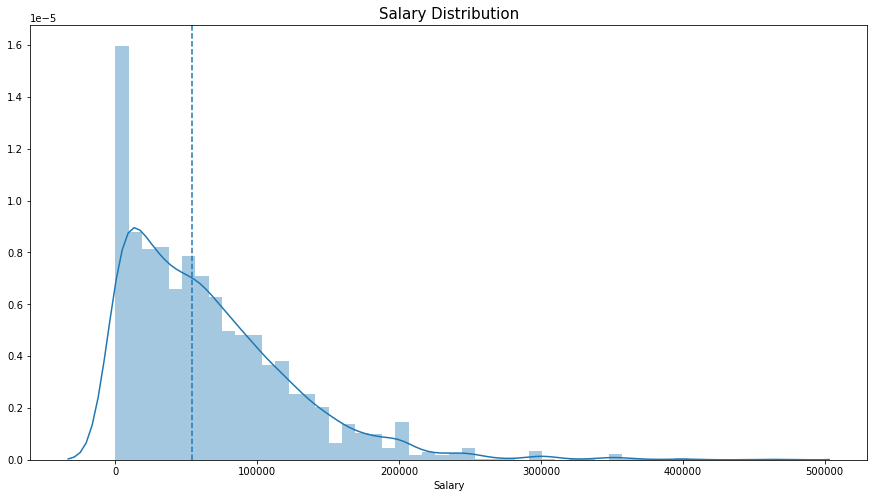

In [78]:
# 처음에는 너무 크게 잡힌 금액 때문에 백만불로 봤으나 오십만불로 표시해 다시 봄
plt.subplots(figsize = (15,8))
salary = salary[salary['Salary'] < 500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle = 'dashed')
plt.title('Salary Distribution', size = 15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

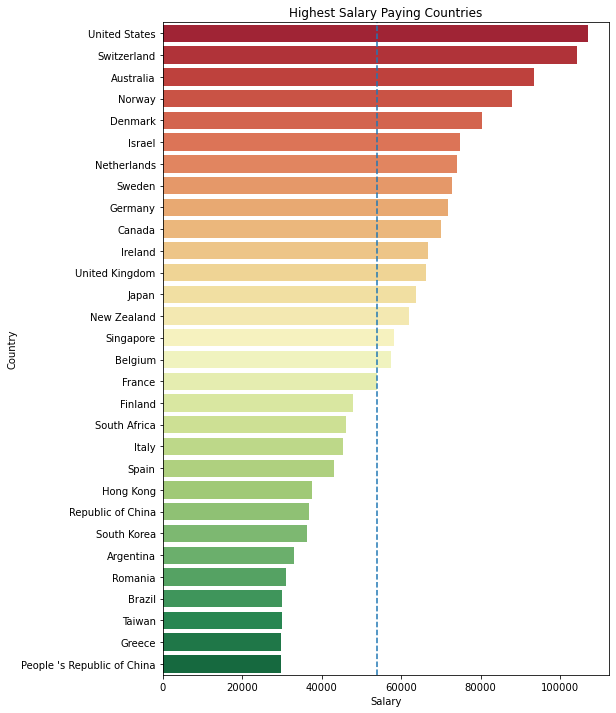

In [82]:
# 국가별 임금은?
plt.subplots(figsize = (8, 12)) # x축길이, y축길이 순서

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending = False)[:30].to_frame()

sns.barplot('Salary', sal_coun.index, data = sal_coun, palette = 'RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle = 'dashed')
plt.title('Highest Salary Paying Countries')

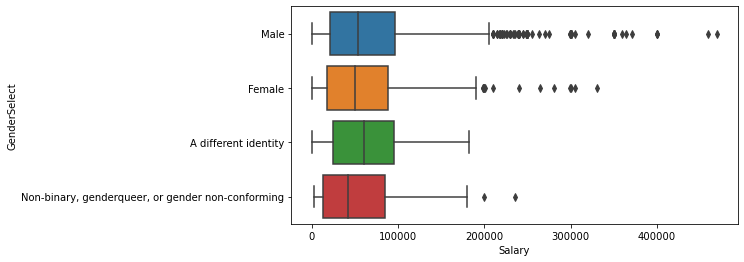

In [83]:
# 성별로 임금의 격차가 존재하는가 파악
# 그러나 위에서 살펴봤듯이 100만불로 잡히는 이상값의 데이터가 존재해 너무 잘못나왔기에 50만불로 확인해야 한다.
plt.subplots(figsize = (8, 4))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data = salary)

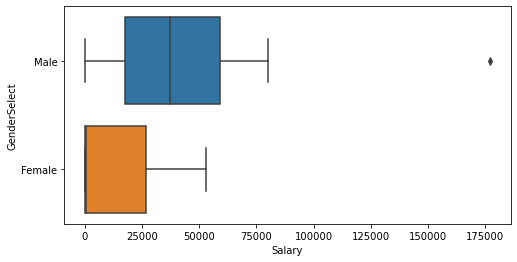

In [85]:
# 그렇다면 우리나라의 데이터만 추출해서 살펴보면 어떻할까?
# 차이가 존재하지만 그 이유는 응답자가 너무 적기 때문에 다시 설문조사할 필요가 있다
salary_korea = salary.loc[(salary['Country'] == 'South Korea')]
plt.subplots(figsize = (8, 4))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data = salary_korea)

In [86]:
salary_korea.shape

(26, 8)

In [87]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [88]:
salary_korea_male = salary_korea[
    salary_korea['GenderSelect'] == 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [89]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


In [92]:
# 개인프로젝트나 학습용 데이터를 어디서 얻나?
mcq['PublicDatasetsSelect'] = mcq[
    'PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [93]:
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),
             axis = 1).stack().reset_index(level = 1, drop = True)

q.name = 'courses'

In [94]:
q = q[q != 'nan'].value_counts()

In [95]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


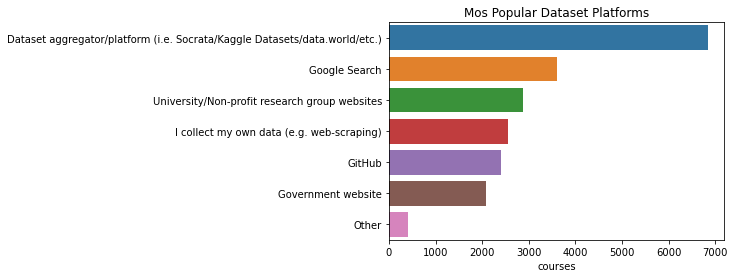

In [97]:
plt.title("Mos Popular Dataset Platforms")
sns.barplot(y = q.index, x = q)

In [98]:
# 주관식 응답자
ff = pd.read_csv('C:/Users/user/Desktop/workSpace/분석/데이터/kaggle_2017_survey/freeformResponses.csv',
                engine = 'python')
ff.shape

(16716, 62)

In [100]:
# 설문내용과 응답자는 누구인가를 알기 위해 불러온 데이터에서 질문항목을 찾는다
qc = question.loc[question[
    'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

# 개인프로젝트에서 공개 된 데이터셋을 다루는 데 가장 어려운 점은 무엇일까? > 질문

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [101]:
# 응답결과 일반적으로 전처리와 결측값을 채우는 문제가 힘들다
ppcff = ff[
    'PersonalProjectsChallengeFreeForm'].value_counts().head(20)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
-,9
Size,9


GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



<function matplotlib.pyplot.show(*args, **kw)>

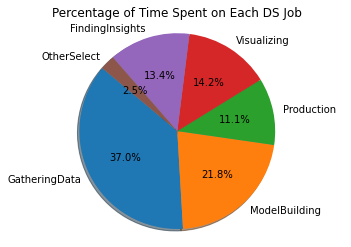

In [107]:
# q10.데이터 사이언스 업무에서 가장 많은 시간이 필요로 하는 일은?
time_features = [
    x for x in mcq.columns if x.find('Time') != -1][4:10]

tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()
    
tdf = pd.Series(tdf)
print(tdf)
print()
plt.pie(tdf, labels = tdf.index, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show

In [108]:
# 데이터사이언스 직업을 고를 때 가장 고려해야 할 것은?
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

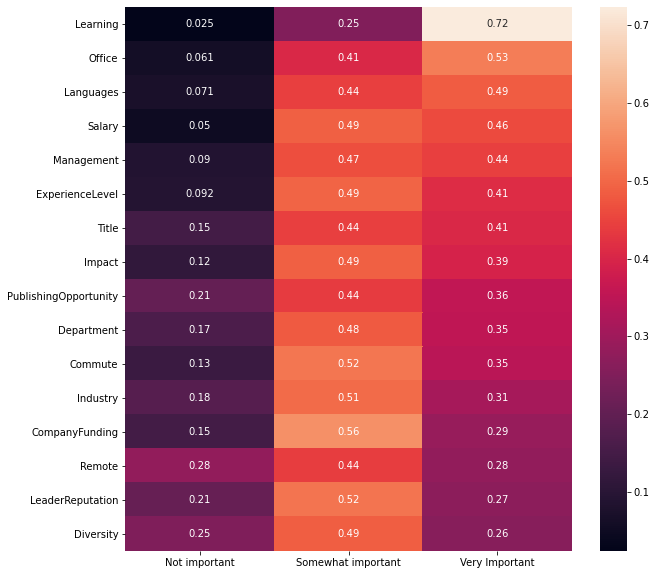

In [112]:
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize = (10, 10))
sns.heatmap(jfdf.sort_values('Very Important', ascending = False), annot = True) 

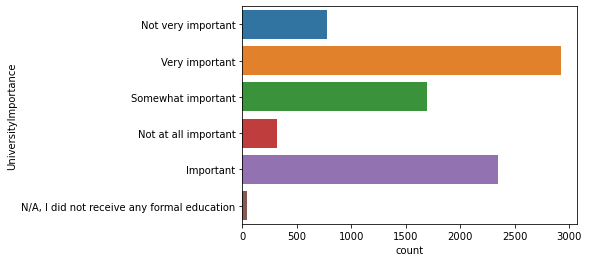

In [119]:
# 데이터 사이언티스트가 되기 위한 학위의 중요성
sns.countplot(y = 'UniversityImportance', data = mcq)

In [123]:
# 데이터사이언스를 시작하려면?
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

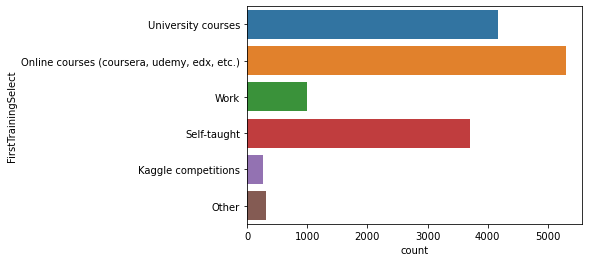

In [124]:
sns.countplot(y = 'FirstTrainingSelect', data = mcq)

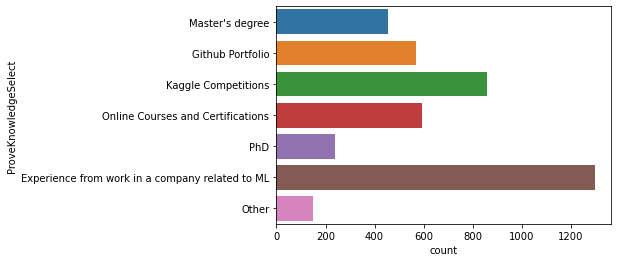

In [127]:
# 데이터사이언티스트 이력서에서 가장 중요한 것은?
sns.countplot(y = 'ProveKnowledgeSelect', data = mcq)

In [128]:
# 머신러닝 알고리즘을 사용하기 위해 수학이 필요할 것인가?
# 응답자 먼저 확인
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [129]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

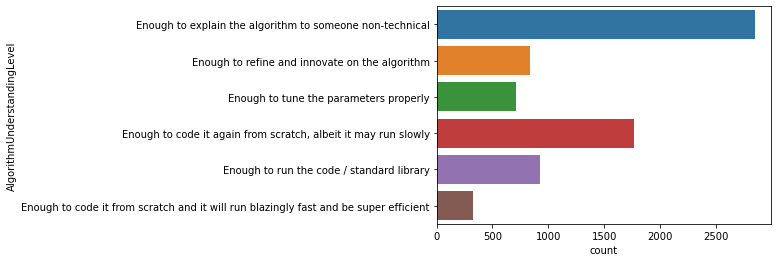

In [130]:
sns.countplot(y = 'AlgorithmUnderstandingLevel', data = mcq)
# 잘 모르는 사람에게 설명할 정도면 충분하다는 응답이 많다

In [132]:
# 일은 어디서 찾을 수 있나?
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


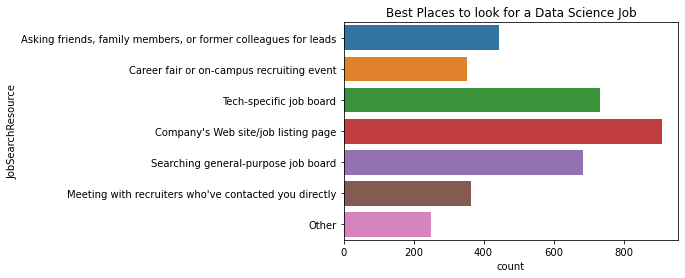

In [131]:
# 현재 구직활동을 하고 있는 집단의 응답
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y = 'JobSearchResource', data = mcq)

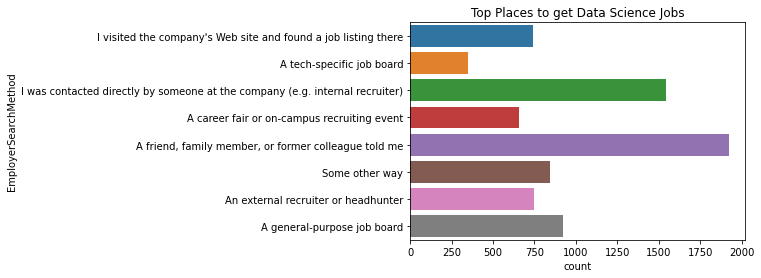

In [133]:
# 현재 취업이 된 집단의 응답
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y = 'EmployerSearchMethod', data = mcq)

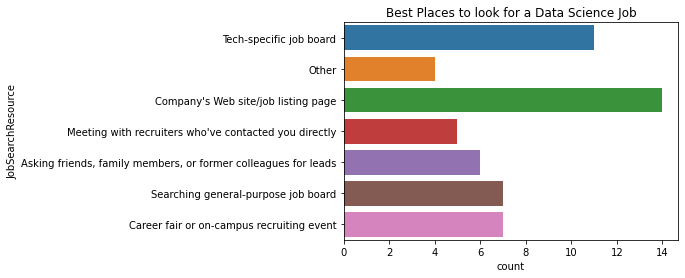

In [134]:
# 한국 사람들의 표본은 어떠한가?
# 앞에서 미리 korea로 데이터를 전처리 해두었다.
# 마찬가지로 구직자 먼저 데이터를 본다
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y = 'JobSearchResource', data = korea)

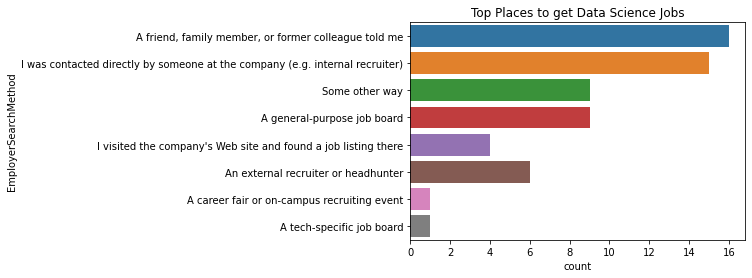

In [135]:
# 한국의 취업한 집단은 어디서 취업정보를 얻었나?
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y = 'EmployerSearchMethod', data = korea)